# Data Science & Business Analytics Intern @The Sparks Foundation(GRIP)

## Shaeen Hanif Khan
## Task 1 - Prediction using Supervised ML

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import seaborn as sns

In [2]:
studentdf = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
studentdf.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
studentdf.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
studentdf.dtypes #checking datatype

Hours     float64
Scores      int64
dtype: object

In [6]:
studentdf.describe() #checking basic stats

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Checking for null values
studentdf.isnull().sum().sort_values(ascending=False)

Scores    0
Hours     0
dtype: int64

##### There are no null values in the data

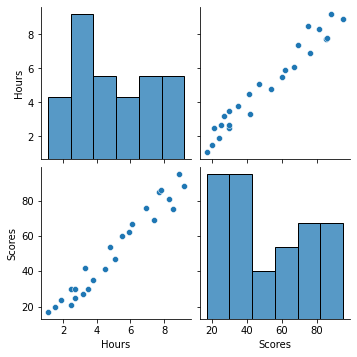

In [8]:
#Checking the distribution of Data
sns.pairplot(studentdf)

##### From the pairplot, we can see that Hours & Scores follow a positive linear relationship and they move in the same direction.
##### We can say that, as the number of hours increases, scores also increases

#### Defining Depenedent & Independent variable

In [9]:
#Since we have only 2 columns we will have to specifically selected values
X = studentdf.iloc[:,:-1].values

In [10]:
y = studentdf.iloc[:,1].values #Dependent Variable

#### Splitting the data into Train & Test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.33) # Test = 30%, Train=70%

#### Creating & Training the Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
#Checking Model Score
lm.score(X_train,y_train)

0.9401296038278026

##### R^2 or Co-effecient of Determination is 0.95 which is quite good and shows that our model is a good fit

In [17]:
lm.intercept_

2.062578695542669

In [18]:
lm.coef_

array([9.63233442])

##### This means with one unit increase of Hours, Score will increase by 9.79

In [19]:
#Regression Equation
regeq = lm.coef_ * X_train + lm.intercept_

#### Model Prediction

In [20]:
lmpredict = lm.predict(X_test)

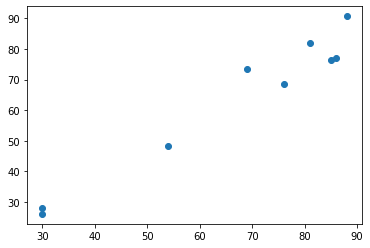

In [21]:
plt.scatter(y_test, lmpredict) #Shows a linear relationship between test data and predicted data

In [22]:
#Comparing Test Data & Predicted Data

compareddata = {'Test Data Scores' : y_test, 'Predicted Scores': lmpredict}

In [23]:
compareddf = pd.DataFrame(compareddata)

In [24]:
compareddf

,Test Data Scores,Predicted Scores
0,85,76.231554
1,76,68.525686
2,86,77.194787
3,88,90.680055
4,81,82.010954
5,54,48.297784
6,30,26.143415
7,30,28.069882
8,69,73.341853


##### The predictions are quite close to the actual test data, yes, we will evaluate the model as well.

### Predicting Score if a student studies for 9.25 hours a day?

In [25]:
hours = 9.25

In [26]:
predictedscore = lm.predict(np.array([hours]).reshape(1, 1))

In [27]:
print("No of Hours:" ,hours)
print("Predicted Score:",predictedscore[0])

No of Hours: 9.25
Predicted Score: 91.16167212289098


#### Model Evaluation through RMSE

In [28]:
from sklearn import metrics

In [29]:
lmrmse = np.sqrt(metrics.mean_squared_error(y_test,lmpredict))

In [30]:
lmrmse

5.661302165271441

##### RMSE is a loss function, hence we need to minimize it. RMSE is used to compare different models and the model with the least RMSE value is the best fit model.RMSE stands for Root mean squared error.

## Answer for Task 1:

#### What will be predicted score if a student studies for 9.25 hrs/ day?

### No of Hours: 9.25
### Predicted Score: 93.07178597926048